In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score, f1_score, roc_auc_score

from xgboost import XGBClassifier   
import warnings
warnings.filterwarnings('ignore')

In [245]:
credit_data= pd.read_csv('credit-card.csv')
credit_data

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487,207634,136765.0,-5.493186,4.057918,-1.795148,-0.522112,-3.901231,-0.338767,-4.216907,1.655481,...,2.827709,-0.480805,0.883135,0.476372,-0.422392,0.266097,-1.249686,-0.237272,0.74,0
9488,210369,137949.0,1.939843,-0.434933,-0.345178,0.307799,-0.487803,0.113880,-0.729222,0.152521,...,0.246981,0.914658,0.141960,0.799542,-0.099047,-0.270436,0.035708,-0.038128,9.99,0
9489,211880,138612.0,1.798427,-0.160432,-1.920048,1.051255,1.204895,0.892956,0.324847,0.194731,...,0.176878,0.684760,-0.019825,-1.506229,0.238479,-0.389693,0.019441,-0.080415,55.00,0
9490,273066,165405.0,2.114637,-0.211168,-1.638108,-0.010894,0.490466,-0.130107,-0.015770,-0.042934,...,-0.339011,-0.921378,0.170633,-1.413620,-0.180180,0.266670,-0.082983,-0.086125,1.98,0


In [246]:
credit_data.shape

(9492, 32)

In [247]:
credit_data['Class'].value_counts()

0    9000
1     492
Name: Class, dtype: int64

[Text(0, 0, 'Not Fraud'), Text(1, 0, 'Fraud')]

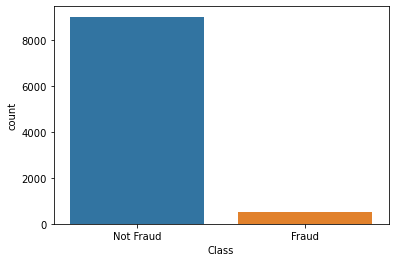

In [248]:
# plot the no of 1's and 0's
a= sns.countplot(credit_data['Class'])
a.set_xticklabels(['Not Fraud', 'Fraud'])

In [249]:
credit_data.shape

(9492, 32)

In [250]:
# check for null values
credit_data.isna().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

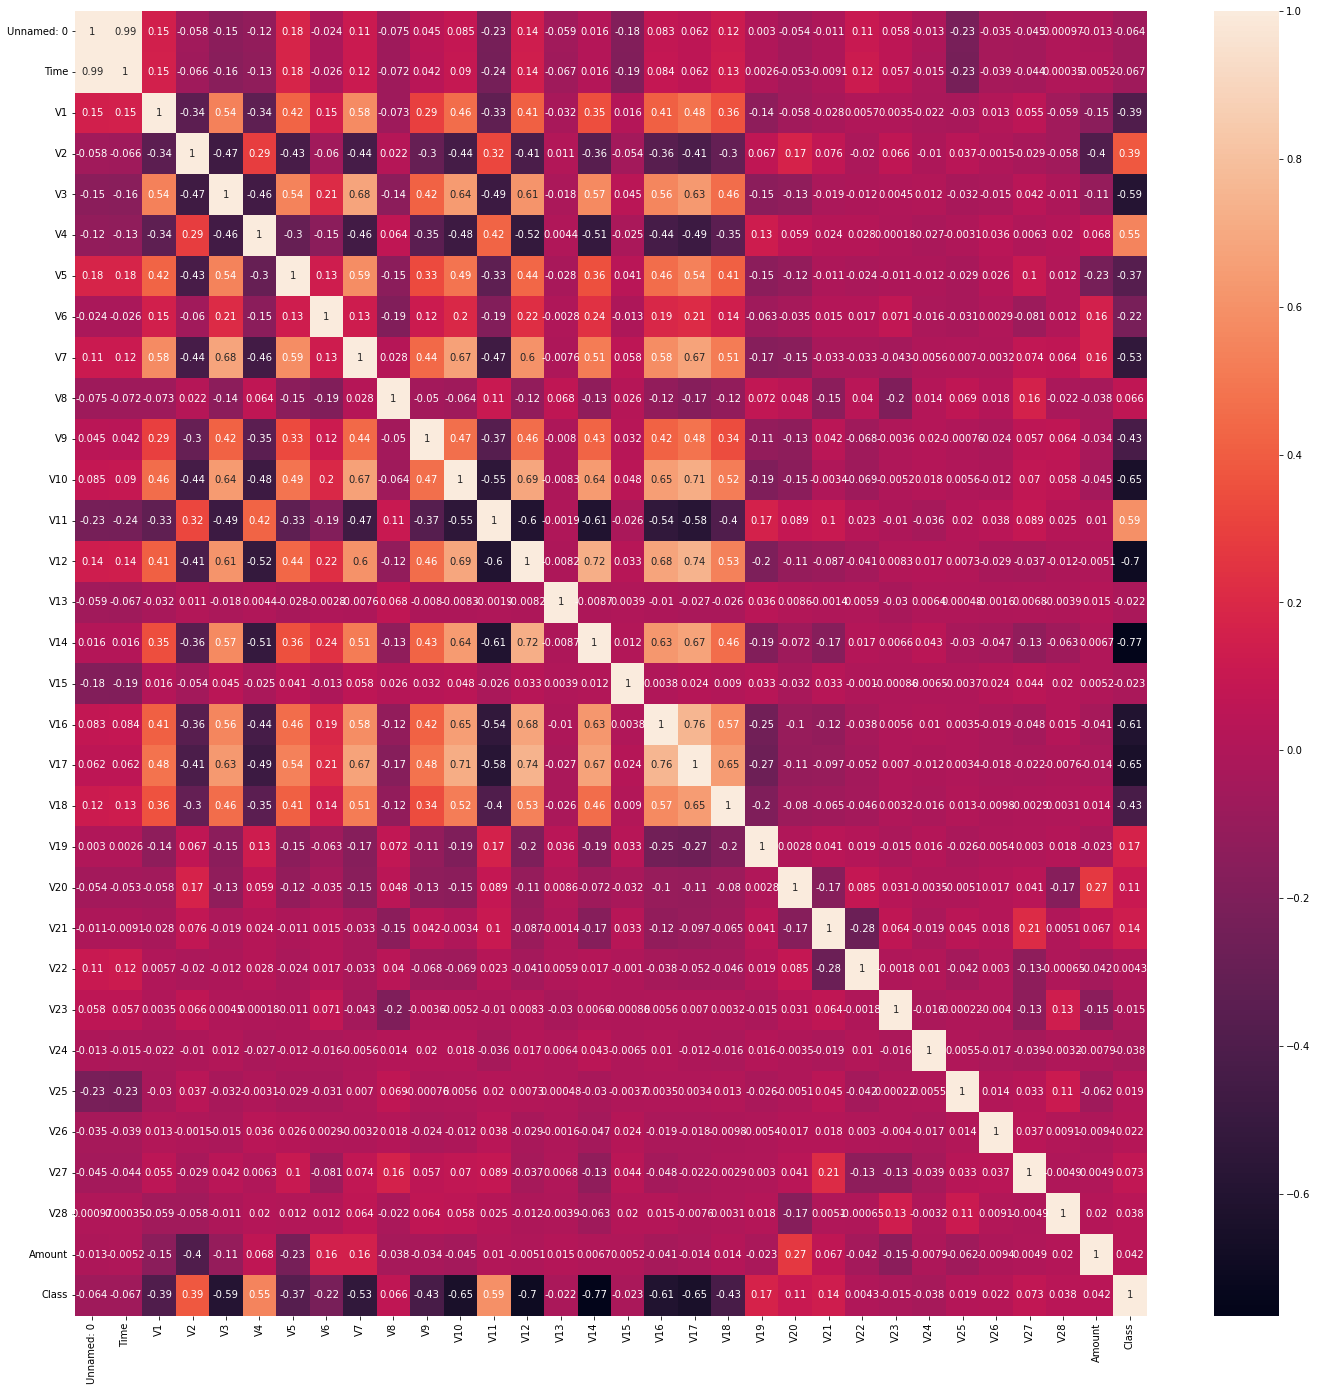

In [251]:
plt.figure(figsize=(24,24))
sns.heatmap(credit_data.corr(), annot=True)
plt.show()

## Model Building

In [252]:
x= credit_data.drop('Class', axis=1)
y= credit_data[['Class']]

In [253]:
# Train Test Split

x_train, x_test,y_train,y_test = train_test_split(x,y, train_size=0.8, random_state=12)

In [254]:
x_test.shape, y_test.shape

((1899, 31), (1899, 1))

In [255]:
x_train.shape,y_train.shape

((7593, 31), (7593, 1))

## Model Trainning

In [256]:
#Fit the model uing XGBOost 

In [257]:
model_1= XGBClassifier()

In [258]:
model_1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [259]:
y_pred= model_1.predict(x_test)

In [260]:
print("Accuracy of the Model is: ", accuracy_score(y_test, y_pred))
print("f1_score of the Model is: ", f1_score(y_test, y_pred))
print("roc_auc_score of the Model is: ", roc_auc_score(y_test, y_pred))

Accuracy of the Model is:  0.9931542917324908
f1_score of the Model is:  0.9319371727748692
roc_auc_score of the Model is:  0.9486616161616162


In [261]:
confusion_matrix(y_test, y_pred)

array([[1797,    3],
       [  10,   89]], dtype=int64)

## Resampling Techniques

In [262]:
# class count
class_count_0, class_count_1 = credit_data['Class'].value_counts()

# divie class
class_0 = credit_data[credit_data['Class'] == 0]
class_1 = credit_data[credit_data['Class'] == 1]

In [263]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 32)

class 1: (492, 32)


## Techniques to Handle the Imbalanced Dataset
- Random Under Sampling
- Random Over Sampling
- Random Under Sampling with Imblearn
- Random Over Sampling with Imblearn
- Under Sampling- Tomek links
- SMOT (Synthatic Minority Over Sampling)
- Near Miss
- Change the Performance Matric
- Penalize the Algorithm

### Random Under Sampling

In [264]:
class_0_under= class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis= 0)

In [265]:
test_under['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [266]:
test_under.shape

(984, 32)

### Random Over Sampling

In [267]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_0, class_1_over], axis=0)

In [268]:
test_over['Class'].value_counts()

0    9000
1    9000
Name: Class, dtype: int64

In [269]:
test_over.shape

(18000, 32)

### Random Under Sampling with Imblearn

In [270]:
from imblearn.under_sampling import RandomUnderSampler

In [271]:
Rand_under = RandomUnderSampler(random_state=12, replacement=True)

In [272]:
x_rand, y_rand= Rand_under.fit_resample(x,y)

In [273]:
x

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487,207634,136765.0,-5.493186,4.057918,-1.795148,-0.522112,-3.901231,-0.338767,-4.216907,1.655481,...,-1.353767,2.827709,-0.480805,0.883135,0.476372,-0.422392,0.266097,-1.249686,-0.237272,0.74
9488,210369,137949.0,1.939843,-0.434933,-0.345178,0.307799,-0.487803,0.113880,-0.729222,0.152521,...,-0.154612,0.246981,0.914658,0.141960,0.799542,-0.099047,-0.270436,0.035708,-0.038128,9.99
9489,211880,138612.0,1.798427,-0.160432,-1.920048,1.051255,1.204895,0.892956,0.324847,0.194731,...,-0.306144,0.176878,0.684760,-0.019825,-1.506229,0.238479,-0.389693,0.019441,-0.080415,55.00
9490,273066,165405.0,2.114637,-0.211168,-1.638108,-0.010894,0.490466,-0.130107,-0.015770,-0.042934,...,-0.233349,-0.339011,-0.921378,0.170633,-1.413620,-0.180180,0.266670,-0.082983,-0.086125,1.98


In [274]:
y.value_counts()

Class
0        9000
1         492
dtype: int64

In [275]:
y_rand.value_counts()

Class
0        492
1        492
dtype: int64

### Random Over Sampling with Imblearn

In [276]:
from imblearn.over_sampling import RandomOverSampler

In [277]:
Rand_over= RandomOverSampler(random_state=12)

In [278]:
x_ros, y_ros= Rand_over.fit_resample(x,y)

In [279]:
y.value_counts()

Class
0        9000
1         492
dtype: int64

In [280]:
y_ros.value_counts()

Class
0        9000
1        9000
dtype: int64

### Under Sampling- Tomek Links

In [281]:
from imblearn.under_sampling import TomekLinks

In [282]:
tom_link= TomekLinks(sampling_strategy='majority' )

In [283]:
x_tl, y_tl= tom_link.fit_resample(x,y)

In [284]:
y.value_counts()

Class
0        9000
1         492
dtype: int64

In [285]:
y_tl.value_counts()

Class
0        8829
1         492
dtype: int64

In [286]:
#2nd Approach 
tom_link_1= TomekLinks(sampling_strategy='all' )#all

In [287]:
x_tl_1, y_tl_1= tom_link_1.fit_resample(x,y)

In [288]:
y_tl_1.value_counts()

Class
0        8829
1         321
dtype: int64

### SMOT (Synthatic Minority Over Sampling)

In [289]:
from imblearn.over_sampling import SMOTE

In [290]:
smt= SMOTE()

In [291]:
x_smt, y_smt= smt.fit_resample(x,y)

In [292]:
y_smt.value_counts()

Class
0        9000
1        9000
dtype: int64

### Near Miss

In [293]:
from imblearn.under_sampling import NearMiss

In [294]:
near_miss= NearMiss()

In [295]:
x_nm, y_nm= near_miss.fit_resample(x,y)

In [296]:
y.value_counts(),y_nm.value_counts()

(Class
 0        9000
 1         492
 dtype: int64,
 Class
 0        492
 1        492
 dtype: int64)

### Change the Performance Matric

In [297]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)

m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.9490311276025563
Accuracy score: 0.949238578680203
F1 score: 0.946808510638298


### Penalize the Algorithm (Cost SensitiveTrainning)

In [298]:
from sklearn.svm import SVC

In [299]:
svm= SVC(class_weight='balanced', probability=True)

In [300]:
svm.fit(x_train, y_train)

SVC(class_weight='balanced', probability=True)

In [301]:
svc_y_predict = svm.predict(x_test)

In [302]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, svc_y_predict))
print('Accuracy score:',accuracy_score(y_test, svc_y_predict))
print('F1 score:',f1_score(y_test, svc_y_predict))

ROCAUC score: 0.6006313131313131
Accuracy score: 0.478146392838336
F1 score: 0.1284080914687775


## =====================================================================================================================